<a href="https://colab.research.google.com/github/srijan-singh/deep-learning/blob/main/Projects/Predicting_House_Price_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
train_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [ ]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [ ]:
# to count the entity in each category
print(train_df.count(),"\n")
print(test_df.count())

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64 

longitude             3000
latitude              3000
housing_median_age    3000
total_rooms           3000
total_bedrooms        3000
population            3000
households            3000
median_income         3000
median_house_value    3000
dtype: int64


In [ ]:
# to get the mean
print(train_df.mean(),"\n")
print(test_df.mean())

longitude             -119.562108
latitude                35.625225
housing_median_age      28.589353
total_rooms           2643.664412
total_bedrooms         539.410824
population            1429.573941
households             501.221941
median_income            3.883578
median_house_value     207.300912
dtype: float64 

longitude             -119.589200
latitude                35.635390
housing_median_age      28.845333
total_rooms           2599.578667
total_bedrooms         529.950667
population            1402.798667
households             489.912000
median_income            3.807272
median_house_value     205.846275
dtype: float64


In [ ]:
# to get the standard deviation
training_df.std()

longitude                2.005166
latitude                 2.137340
housing_median_age      12.586937
total_rooms           2179.947071
total_bedrooms         421.499452
population            1147.852959
households             384.520841
median_income            1.908157
median_house_value     115.983764
dtype: float64

In [ ]:
# to get the min value
training_df.min()

longitude            -124.3500
latitude               32.5400
housing_median_age      1.0000
total_rooms             2.0000
total_bedrooms          1.0000
population              3.0000
households              1.0000
median_income           0.4999
median_house_value     14.9990
dtype: float64

In [ ]:
# to get the max value
training_df.max()

longitude              -114.3100
latitude                 41.9500
housing_median_age       52.0000
total_rooms           37937.0000
total_bedrooms         6445.0000
population            35682.0000
households             6082.0000
median_income            15.0001
median_house_value      500.0010
dtype: float64

In [ ]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

In [ ]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
284/284 [==============================] - 1s 3ms/step - loss: 52122.3125 - root_mean_squared_error: 228.3031 - val_loss: 26102.3613 - val_root_mean_squared_error: 161.5623
Epoch 2/30
284/284 [==============================] - 1s 3ms/step - loss: 35627.1016 - root_mean_squared_error: 188.7514 - val_loss: 31860.2852 - val_root_mean_squared_error: 178.4945
Epoch 3/30
284/284 [==============================] - 1s 3ms/step - loss: 33882.1523 - root_mean_squared_error: 184.0710 - val_loss: 35889.3242 - val_root_mean_squared_error: 189.4448
Epoch 4/30
284/284 [==============================] - 1s 3ms/step - loss: 32757.9102 - root_mean_squared_error: 180.9915 - val_loss: 26283.1953 - val_root_mean_squared_error: 162.1209
Epoch 5/30
284/284 [==============================] - 1s 3ms/step - loss: 30706.7676 - root_mean_squared_error: 175.2335 - val_loss: 22362.2402 - val_root_mean_squared_error: 149.5401
Epoch 6/30
284/284 [==============================] - 1s 3ms/step - loss: 30405.

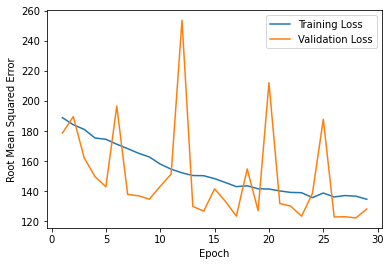

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 30
batch_size = 30

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.5

# Identify the feature and the label.
my_feature="median_income" and "households" and "population" and "total_rooms"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [ ]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

100/100 [==============================] - 0s 2ms/step - loss: 12787.8350 - root_mean_squared_error: 113.0833
